## Observations and Insights 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#find common column to base our merge on
MergeData = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
MergeData.head()

In [ ]:
# Checking the number of mice.
MergeData["Mouse ID"].count()

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#Remove any data (records) associated with that mouse ID. Use the cleaned data in the remaining steps.(next two steps)

MergeData[MergeData.duplicated()]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
MergeData.loc[MergeData["Mouse ID"]=='g989'].index
#MergeData = [got_data["Mouse ID"]=='g989'].value_counts()
#MergeData

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [5]:
#current for comparison
MergeData.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [6]:
# Define drop to create a clean DataFrame by dropping the duplicate mouse by its ID.
MergeData = MergeData.drop(MergeData.loc[MergeData["Mouse ID"]== "g989"].index)

In [7]:
#for comparison
MergeData.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

In [8]:
CleanData_df = MergeData.drop_duplicates()

In [9]:
# Checking the number of mice in the clean DataFrame.
CleanData_df["Mouse ID"].count()

1880

In [10]:
CleanData_df.shape

(1880, 8)

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_df = CleanData_df.groupby(["Drug Regimen"]) 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = regimen_df.mean()["Tumor Volume (mm3)"]
drug_median = regimen_df.median()["Tumor Volume (mm3)"]
drug_variance = regimen_df.var()["Tumor Volume (mm3)"]
drug_dev = regimen_df.std()["Tumor Volume (mm3)"]
drug_SE = regimen_df.sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
Regimen_summary_df = pd.DataFrame({"Mean Tumor Volume": drug_mean,
                                   "Median Tumor Volume": drug_median,
                                   "Tumor Volume Variance": drug_median,
                                   "Tumor Volume Std.Dev.": drug_variance,
                                   "Tumor Volume Std.Err.": drug_SE})

#print(drug_mean) - prints
#print(drug_median) - prints
#print(drug_variance) - prints
#print(drug_dev) - prints
#print (drug_SE)
Regimen_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,52.431737,59.450562,0.573111


In [12]:
# Using the aggregation method, produce the same summary statistics in a single line
Regimen_summary2 = CleanData_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
Regimen_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

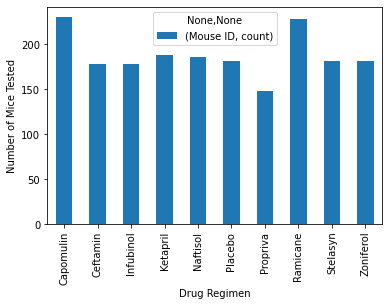

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
Unique_mice = CleanData_df.groupby("Drug Regimen").agg({"Mouse ID":["count"]}).plot.bar()
Unique_mice.set_ylabel("Number of Mice Tested")
#must format using pyplot

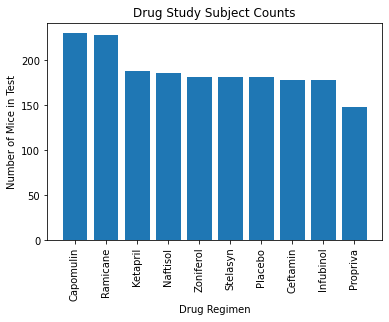

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#Note: the Pandas and Matplotlibs plots should look identical.
mice_subjects = CleanData_df['Drug Regimen'].value_counts()
#print provides the list
plt.bar(mice_subjects.index.values,mice_subjects.values)
plt.title("Drug Study Subject Counts")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice in Test")
plt.xticks(rotation=90)
plt.show()

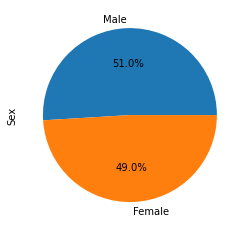

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders1 = CleanData_df["Sex"].value_counts()
plot = genders1.plot.pie(y='Gender', autopct='%1.1f%%')
#plot.pie

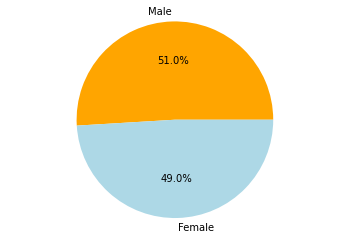

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Note: the Pandas and Matplotlibs plots should look identical.
genders2 = CleanData_df["Sex"].value_counts()


# Labels for the sections of our pie chart
labels = ["Male", "Female"]

colors = ["orange", "lightblue"]

# Create the pie - autopct automatically finds the percentages of each part of the pie chart
plt.pie(genders2, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis("equal")
#*****add a Yaxis for gender
# Save an image of our chart and print the final product to the screen
plt.savefig("../my_images/gender_PyPies.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#groupby drug Mouse ID and tumor volume and reset 
#grouped_data = CleanData_df.groupby(["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"])
#grouped_data = grouped_data.reset_index()
#grouped_data.head()

# Capomulin, Ramicane, Infubinol, and Ceftamin
#Cap = CleanData_df.loc[CleanData_df["Drug Regimen"]=="Capomulin",:]
#Ram = CleanData_df.loc[CleanData_df["Drug Regimen"]=="Ramicane",:]
#Inf = CleanData_df.loc[CleanData_df["Drug Regimen"]=="Infubinol",:]
#Cef = CleanData_df.loc[CleanData_df["Drug Regimen"]=="Ceftamin",:]

#def combine_lists(Cap, Ram, Inf, Cef):
#    lt = []
#    lt.append(Cap)
#    lt.append(Ram)
#    lt.append (Inf)
#    lt.append (Cef)
#   return [lt if not lt or lt[0] else None for lt in args]
#the above gives me a list with just the 4 drugs - hum before I combine them I may want to find the info per 


# Start by getting the last (greatest) timepoint for each mouse
#*max timepoint ??
#two column groupby with a function performed on one! then reset index
last_timepoint = CleanData_df.groupby(["Mouse ID"])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint



#*********Notes to keep
#Timepoint_max = CleanData_df.groupby("Drug Regimen").agg({"Timepoint":["max"]}) - max timepoint is 45 for all drugs
#I can use groupby to get all of the data based on drug or I can use .loc == drug to get separate lists for each drug and put in summary

#This gives me the number of mice per study
#mice_subjects = CleanData_df['Drug Regimen'].value_counts()
#https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/                           
#https://www.bitdegree.org/learn/pandas-groupby
#https://stackoverflow.com/questions/49783178/python-keep-other-columns-when-using-sum-with-groupby                         
#https://stackoverflow.com/questions/31569549/how-to-groupby-a-dataframe-in-pandas-and-keep-columns
#retrieving rows by loc method https://www.geeksforgeeks.org/python-pandas-extracting-rows-using-loc/#:~:text=loc%5B%5D%20method%20is%20a,in%20the%20caller%20data%20frame.                          
#https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.DataFrame.agg.html
#****************************

# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#mice_subjects
#mice_subjects - gives this for each of the drug regimens, but for all not just 4 - this is value count of cleandata drug..
                           
#print(final_mice)
#plt.clf()
#final_mice.groupby["Drug Regimen"].count().plot(kind='bar')
#plt.show()
#plt.bar(final_mice.index.values,final_mice.values)


<function combine_lists at 0x000001726BA5CCA0>


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers (acrose the 4 regimes)
#highlight any potential outliers in the plot by changing their color and style (see hint below).
#color see part 3 wrestlers maybe    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
 
#Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.



In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Isolate data for one mouse
Capomulin_mice = CleanData_df.loc[CleanData_df["Drug Regimen"] =="Capomulin",:]
One_mouse = Capomulin_mice.loc[Capomulin_mice["Mouse ID"]=="s185",:]
#NOTE this did not work properly when set index to Mouse ID

#set x and y values
Time = One_mouse["Timepoint"]
Vol = One_mouse["Tumor Volume (mm3)"]

#Title and axis labels
plt.title("Capomulin Tumor Response Over Time")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Study Timepoints")

# Plot the world average as a line chart
tumor_time, = plt.plot(Time, Vol, color="blue", label="??" )

# Show the chart
plt.show()


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Capomulin_mice
#Use Capomulin_mice
Capomulin_mice = CleanData_df.loc[CleanData_df["Drug Regimen"] =="Capomulin",:]
Capomulin_mice = Capomulin_mice.set_index("Mouse ID")
#avg_vol = round(Capomulin_mice.mean()["Tumor Volume (mm3)"]), 2
avg_vol = round(Capomulin_mice.mean()), 2

#years = average_unemployment.keys()
weight = round(Capomulin_mice["Weight (g)"]), 2
# Set the upper and lower limits of our x axis
plt.xlim(14,26)
plt.ylim(24,46)
#print(weight)
#print(avg_vol)
plt.scatter(weight, avg_vol, marker="o", facecolors="red", edgecolors="black")
plt.title("Capomulin Weight to Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

In [ ]:
Capomulin_mice

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


Here are some final considerations:

* You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

* See the [starter workbook](Pymaceuticals/pymaceuticals_starter.ipynb) for help on what modules to import and expected format of the notebook.

## Hints and Considerations

* Be warned: These are very challenging tasks. Be patient with yourself as you trudge through these problems. They will take time and there is no shame in fumbling along the way. Data visualization is equal parts exploration, equal parts resolution.

* You have been provided a starter notebook. Use the code comments as a reminder of steps to follow as you complete the assignment.

* Don't get bogged down in small details. Always focus on the big picture. If you can't figure out how to get a label to show up correctly, come back to it. Focus on getting the core skeleton of your notebook complete. You can always revisit old problems.

* While you are trying to complete this assignment, feel encouraged to constantly refer to Stack Overflow and the Pandas documentation. These are needed tools in every data analyst's tool belt.

* Remember, there are many ways to approach a data problem. The key is to break up your task into micro tasks. Try answering questions like:

  * How does my DataFrame need to be structured for me to have the right _x_-axis and _y_-axis?

  * How do I build a basic scatter plot?

  * How do I add a label to that scatter plot?

  * Where would the labels for that scatter plot come from?